# Assorted Topics from Chapters 11 and 12
## Ponder and Prove
### Due: Saturday, 20 February 2021, 11:59 pm

We found an issue for the dyck PDA in the automation webtool. It seems to crash on the “,S,SS transition. Also for the pdaE the issue loops are the ",T,T*F and ",T,T+E. It looks like any time we remove something and push the same symbol back on the stack it causes a crash. So when it gets a loop like ", a, aa it keeps running that same transition. Since it is an epsilon transition we never extinguish the input string so it goes on forever.
My initial assumption is that it does a depth-first rather than a breadth-first search through the graph. However, this wouldn’t make any sense as if it did a depth-frist search it would get stuck on any loop.
Another possibility was that each transition makes a copy of the stack. If the state falls out of the current-state set then its corresponding stack is deleted, or if the state changes to another state then its stack is transferred to the new state (with the corresponding data for that transition pushed on/poped off). In this case, we assume that we can have duplicates in our current-state set, as each element is not a single state, but a state/stack pair.
However, it seems more likely that the tool does not know when to stop checking epsilon transitions. In a normal case, (like “,”,a) the tool will have to stop applying this transition because it will run out of ‘a’s to take off the stack. However, ", a, aa will continuously add new ‘a’s to the stack.
As shown below, this can be sort of solved by adding an alias for the issue character. So for example, have an “,a,bb and “,b,aa transition where ‘a’ and ‘b’ are interchangeable. However, this would require duplicating every transition dependent on an ‘a’ to an equivalent ‘b’ transition. Due to the time that would take, how messy the PDAs would be, and the fact that we already have Jove, we chose not to pursue that fix.

It seems the only PDA in this assignment that will work with the tool (at least without making a very ungly convoluted graph with double the number of transitions states) is the wwR PDA since it does not have any “,a,a type transitions.


https://automatonsimulator.com/#%7B%22type%22%3A%22PDA%22%2C%22pda%22%3A%7B%22transitions%22%3A%7B%22start%22%3A%7B%22%22%3A%7B%22%22%3A%5B%7B%22state%22%3A%22s0%22%2C%22stackPushChar%22%3A%22%23%22%7D%5D%7D%7D%2C%22s0%22%3A%7B%22%22%3A%7B%22%22%3A%5B%7B%22state%22%3A%22s1%22%2C%22stackPushChar%22%3A%22S%22%7D%5D%7D%7D%2C%22s1%22%3A%7B%22%22%3A%7B%22S%22%3A%5B%7B%22state%22%3A%22s2%22%2C%22stackPushChar%22%3A%22E%22%7D%5D%2C%22%23%22%3A%5B%5D%2C%22E%22%3A%5B%5D%2C%22%22%3A%5B%7B%22state%22%3A%22s3%22%2C%22stackPushChar%22%3A%22S%22%7D%5D%7D%2C%22b%22%3A%7B%22b%22%3A%5B%5D%7D%2C%22)%22%3A%7B%22)%22%3A%5B%5D%7D%2C%22(%22%3A%7B%22(%22%3A%5B%5D%7D%7D%2C%22s2%22%3A%7B%22%22%3A%7B%22%22%3A%5B%7B%22state%22%3A%22s1%22%2C%22stackPushChar%22%3A%22E%22%7D%5D%7D%7D%2C%22s3%22%3A%7B%22%22%3A%7B%22E%22%3A%5B%7B%22state%22%3A%22s1%22%2C%22stackPushChar%22%3A%22S%22%7D%5D%7D%7D%7D%2C%22startState%22%3A%22start%22%2C%22acceptStates%22%3A%5B%22start%22%2C%22s0%22%5D%7D%2C%22states%22%3A%7B%22start%22%3A%7B%22isAccept%22%3Atrue%7D%2C%22s0%22%3A%7B%22isAccept%22%3Atrue%2C%22top%22%3A312%2C%22left%22%3A213%2C%22displayId%22%3A%22s0%22%7D%2C%22s1%22%3A%7B%22top%22%3A320%2C%22left%22%3A416%2C%22displayId%22%3A%22s1%22%7D%2C%22s2%22%3A%7B%22top%22%3A481%2C%22left%22%3A418%2C%22displayId%22%3A%22s2%22%7D%2C%22s3%22%3A%7B%22top%22%3A168%2C%22left%22%3A416%2C%22displayId%22%3A%22s3%22%7D%7D%2C%22transitions%22%3A%5B%7B%22stateA%22%3A%22start%22%2C%22label%22%3A%22%CF%B5%2C%CF%B5%2C%23%22%2C%22stateB%22%3A%22s0%22%7D%2C%7B%22stateA%22%3A%22s0%22%2C%22label%22%3A%22%CF%B5%2C%CF%B5%2CS%22%2C%22stateB%22%3A%22s1%22%7D%2C%7B%22stateA%22%3A%22s1%22%2C%22label%22%3A%22%CF%B5%2CS%2CE%22%2C%22stateB%22%3A%22s2%22%7D%2C%7B%22stateA%22%3A%22s1%22%2C%22label%22%3A%22%CF%B5%2C%CF%B5%2CS%22%2C%22stateB%22%3A%22s3%22%7D%2C%7B%22stateA%22%3A%22s2%22%2C%22label%22%3A%22%CF%B5%2C%CF%B5%2CE%22%2C%22stateB%22%3A%22s1%22%7D%2C%7B%22stateA%22%3A%22s3%22%2C%22label%22%3A%22%CF%B5%2CE%2CS%22%2C%22stateB%22%3A%22s1%22%7D%5D%2C%22bulkTests%22%3A%7B%22accept%22%3A%22((())())()%22%2C%22reject%22%3A%22%22%7D%7D

## The goal is for you to make some good connections between these formal objects:
 
* Parse trees
* Derivation Sequences
* Instantaneous Description Sequences
 
See the example in Figure 11.1, with the derivation sequence shown on the right of this figure, and the ID sequence also shown below.

In [1]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
import sys

# -- Detect if in Own Install or in Colab
try:
    import google.colab
    OWN_INSTALL = False
except:
    OWN_INSTALL = True
    
if OWN_INSTALL:

  sys.path[0:0] = ['../../../../..',  '../../../../../3rdparty',  
                   '../../../..',  '../../../../3rdparty',  
                   '../../..',     '../../../3rdparty', 
                   '../..',        '../../3rdparty',
                   '..',           '../3rdparty',
                   '../Jove',      '../Jove/jove']

else: # In colab
  ! if [ ! -d Jove ]; then git clone https://github.com/ganeshutah/Jove Jove; fi
  sys.path.append('./Jove')
  sys.path.append('./Jove/jove')

# -- common imports --
from jove.SystemImports import *
from jove.DotBashers    import *
from jove.Def_md2mc     import *
from jove.Def_PDA       import * 
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Cloning into 'Jove'...
remote: Enumerating objects: 4634, done.
remote: Total 4634 (delta 0), reused 0 (delta 0), pack-reused 4634
Receiving objects: 100% (4634/4634), 7.38 MiB | 18.16 MiB/s, done.
Resolving deltas: 100% (3005/3005), done.
You may use any of these help commands:
help(ResetStNum)
help(NxtStateStr)

You may use any of these help commands:
help(md2mc)
.. and if you want to dig more, then ..
help(default_line_attr)
help(length_ok_input_items)
help(union_line_attr_list_fld)
help(extend_rsltdict)
help(form_delta)
help(get_machine_components)

You may use any of these help commands:
help(explore_pda)
help(run_pda)
help(classify_l_id_path)
help(h_run_pda)
help(interpret_w_eps)
help(step_pda)
help(suvivor_id)
help(term_id)
help(final_id)
help(cvt_str_to_sym)
help(is_surv_id)
help(subsumed)
help(is_term_id)
help(is_final_id)



## Dyck CFG and Direct-Converted PDA

 Note that the CFG is inside the PDA code as a comment.

Generating LALR tables


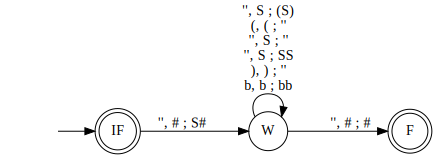

In [2]:
dyck = md2mc('''
PDA
!!-- CFG follows
!!-- S -> SS | (S) | ''

IF : '',#; S# -> W

W  : (,(; '' -> W
W  : ),); '' -> W

W  : b,b; bb -> W

W  : '',S; SS  -> W
W  : '',S; (S) -> W
W  : '',S; ''  -> W

W  : '',#; # -> F

''')
dotObj_pda(dyck, FuseEdges=True)

### TODO: Convert and compare Jove with the Automaton Simulator

This is the one demonstrated in class last week:

https://automatonsimulator.com/

Include a link encoding your saved machine.

https://automatonsimulator.com/#%7B%22type%22%3A%22PDA%22%2C%22pda%22%3A%7B%22transitions%22%3A%7B%22start%22%3A%7B%22%22%3A%7B%22%22%3A%5B%7B%22state%22%3A%22s0%22%2C%22stackPushChar%22%3A%22%23%22%7D%5D%7D%7D%2C%22s0%22%3A%7B%22%22%3A%7B%22%22%3A%5B%7B%22state%22%3A%22s1%22%2C%22stackPushChar%22%3A%22S%22%7D%5D%7D%7D%2C%22s1%22%3A%7B%22%22%3A%7B%22S%22%3A%5B%7B%22state%22%3A%22s2%22%2C%22stackPushChar%22%3A%22S%22%7D%2C%7B%22state%22%3A%22s1%22%2C%22stackPushChar%22%3A%22%22%7D%2C%7B%22state%22%3A%22s4%22%2C%22stackPushChar%22%3A%22)%22%7D%5D%2C%22%23%22%3A%5B%7B%22state%22%3A%22s6%22%2C%22stackPushChar%22%3A%22%23%22%7D%5D%7D%2C%22b%22%3A%7B%22b%22%3A%5B%7B%22state%22%3A%22s3%22%2C%22stackPushChar%22%3A%22b%22%7D%5D%7D%2C%22)%22%3A%7B%22)%22%3A%5B%7B%22state%22%3A%22s1%22%2C%22stackPushChar%22%3A%22%22%7D%5D%7D%2C%22(%22%3A%7B%22(%22%3A%5B%7B%22state%22%3A%22s1%22%2C%22stackPushChar%22%3A%22%22%7D%5D%7D%7D%2C%22s2%22%3A%7B%22%22%3A%7B%22%22%3A%5B%7B%22state%22%3A%22s1%22%2C%22stackPushChar%22%3A%22S%22%7D%5D%7D%7D%2C%22s3%22%3A%7B%22%22%3A%7B%22%22%3A%5B%7B%22state%22%3A%22s1%22%2C%22stackPushChar%22%3A%22b%22%7D%5D%7D%7D%2C%22s4%22%3A%7B%22%22%3A%7B%22%22%3A%5B%7B%22state%22%3A%22s5%22%2C%22stackPushChar%22%3A%22S%22%7D%5D%7D%7D%2C%22s5%22%3A%7B%22%22%3A%7B%22%22%3A%5B%7B%22state%22%3A%22s1%22%2C%22stackPushChar%22%3A%22(%22%7D%5D%7D%7D%7D%2C%22startState%22%3A%22start%22%2C%22acceptStates%22%3A%5B%22start%22%2C%22s0%22%2C%22s6%22%5D%7D%2C%22states%22%3A%7B%22start%22%3A%7B%22isAccept%22%3Atrue%7D%2C%22s0%22%3A%7B%22isAccept%22%3Atrue%2C%22top%22%3A312%2C%22left%22%3A213%2C%22displayId%22%3A%22s0%22%7D%2C%22s1%22%3A%7B%22top%22%3A320%2C%22left%22%3A416%2C%22displayId%22%3A%22s1%22%7D%2C%22s2%22%3A%7B%22top%22%3A479%2C%22left%22%3A309%2C%22displayId%22%3A%22s2%22%7D%2C%22s4%22%3A%7B%22top%22%3A237%2C%22left%22%3A591%2C%22displayId%22%3A%22s4%22%7D%2C%22s6%22%3A%7B%22isAccept%22%3Atrue%2C%22top%22%3A329%2C%22left%22%3A714%2C%22displayId%22%3A%22s6%22%7D%2C%22s3%22%3A%7B%22top%22%3A471%2C%22left%22%3A433%2C%22displayId%22%3A%22s3%22%7D%2C%22s5%22%3A%7B%22top%22%3A230%2C%22left%22%3A778%2C%22displayId%22%3A%22s5%22%7D%7D%2C%22transitions%22%3A%5B%7B%22stateA%22%3A%22start%22%2C%22label%22%3A%22%CF%B5%2C%CF%B5%2C%23%22%2C%22stateB%22%3A%22s0%22%7D%2C%7B%22stateA%22%3A%22s0%22%2C%22label%22%3A%22%CF%B5%2C%CF%B5%2CS%22%2C%22stateB%22%3A%22s1%22%7D%2C%7B%22stateA%22%3A%22s1%22%2C%22label%22%3A%22%CF%B5%2CS%2CS%22%2C%22stateB%22%3A%22s2%22%7D%2C%7B%22stateA%22%3A%22s1%22%2C%22label%22%3A%22%CF%B5%2CS%2C%CF%B5%22%2C%22stateB%22%3A%22s1%22%7D%2C%7B%22stateA%22%3A%22s1%22%2C%22label%22%3A%22%CF%B5%2CS%2C)%22%2C%22stateB%22%3A%22s4%22%7D%2C%7B%22stateA%22%3A%22s1%22%2C%22label%22%3A%22%CF%B5%2C%23%2C%23%22%2C%22stateB%22%3A%22s6%22%7D%2C%7B%22stateA%22%3A%22s1%22%2C%22label%22%3A%22b%2Cb%2Cb%22%2C%22stateB%22%3A%22s3%22%7D%2C%7B%22stateA%22%3A%22s1%22%2C%22label%22%3A%22)%2C)%2C%CF%B5%22%2C%22stateB%22%3A%22s1%22%7D%2C%7B%22stateA%22%3A%22s1%22%2C%22label%22%3A%22(%2C(%2C%CF%B5%22%2C%22stateB%22%3A%22s1%22%7D%2C%7B%22stateA%22%3A%22s2%22%2C%22label%22%3A%22%CF%B5%2C%CF%B5%2CS%22%2C%22stateB%22%3A%22s1%22%7D%2C%7B%22stateA%22%3A%22s3%22%2C%22label%22%3A%22%CF%B5%2C%CF%B5%2Cb%22%2C%22stateB%22%3A%22s1%22%7D%2C%7B%22stateA%22%3A%22s4%22%2C%22label%22%3A%22%CF%B5%2C%CF%B5%2CS%22%2C%22stateB%22%3A%22s5%22%7D%2C%7B%22stateA%22%3A%22s5%22%2C%22label%22%3A%22%CF%B5%2C%CF%B5%2C(%22%2C%22stateB%22%3A%22s1%22%7D%5D%2C%22bulkTests%22%3A%7B%22accept%22%3A%22((())())()%22%2C%22reject%22%3A%22%22%7D%7D

In [3]:
explore_pda('((())())()', dyck)

String ((())())() accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('IF', '((())())()', '#')
->  ('W', '((())())()', 'S#')
->  ('W', '((())())()', 'SS#')
->  ('W', '((())())()', '(S)S#')
->  ('W', '(())())()', 'S)S#')
->  ('W', '(())())()', 'SS)S#')
->  ('W', '(())())()', '(S)S)S#')
->  ('W', '())())()', 'S)S)S#')
->  ('W', '())())()', '(S))S)S#')
->  ('W', '))())()', 'S))S)S#')
->  ('W', '))())()', '))S)S#')
->  ('W', ')())()', ')S)S#')
->  ('W', '())()', 'S)S#')
->  ('W', '())()', '(S))S#')
->  ('W', '))()', 'S))S#')
->  ('W', '))()', '))S#')
->  ('W', ')()', ')S#')
->  ('W', '()', 'S#')
->  ('W', '()', '(S)#')
->  ('W', ')', 'S)#')
->  ('W', ')', ')#')
->  ('W', '', '#')
->  ('F', '', '#') .


## Derivation Sequences (DS) are Formed from Instantaneous Description (ID) Sequences

Note that Derivation sequences (DS) are "flattened parse trees"!

Here's how to reverse-engineer DS from the ID sequence printed:

```
     ID SEQUENCE                 -- FORMING EACH STEP of DERIVATION SEQUENCE
=================================================================================     
->  ('IF', '((())())()', '#')    -- 
->  ('W', '((())())()', 'S#')    -- S
->  ('W', '((())())()', 'SS#')   -- S     => SS      (on top of stack)
->  ('W', '((())())()', '(S)S#') -- SS    => (S)S    (push on TOS; record in deriv seq
->  ('W', '(())())()', 'S)S#')   -- (S)S  => popped  (so no new derivation; leaf-match in PT)
->  ('W', '(())())()', 'SS)S#')  -- (S)S  => (SS)S   (new push; so record in deriv. sequence)
->  ('W', '(())())()', '(S)S)S#')-- (SS)S => ((S)S)S (again notice new push!)
```

Thus, we note that S => SS => (S)S => (SS)S => ((S)S)S => ... ((())())() 




 

### TODO Draw the Parse Tree from this DS.

Use a neat drawing tool, and put the source and the PNG here.

Here was my attempt.

Due to the way DOT works, I had to replace the brackets and ".

a = (

b = )

v = "

Also, since DOT does not support identical names, I had to number each item.

In [ ]:
  graph {
    S1--S2
    S1--S3
    S3--a1
    S3--v1
    S3--b1

    S2--a2
    S2--S4
    S2--b2

    S4--S5
    S4--S6

    S6--a3
    S6--v3
    S6--b3

    S5--a4
    S5--S7
    S5--b4

    S7--a5
    S7--v4
    S7--b5
  }

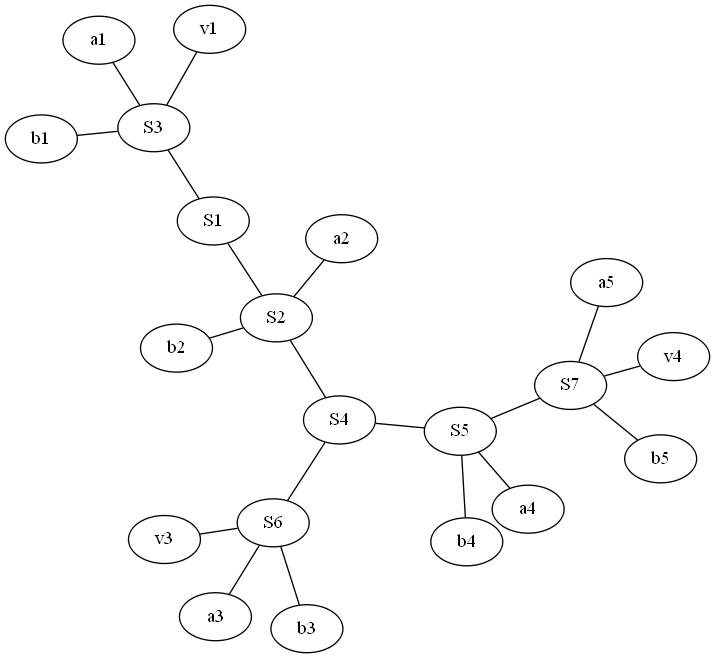

Here was the one Matthew was able to make.

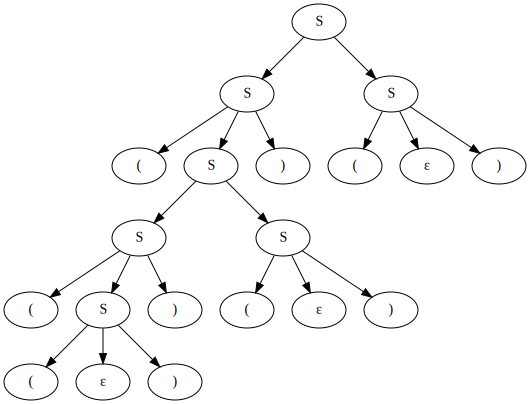

In [47]:
from graphviz import Digraph
# Create Digraph object
dot = Digraph()
# Add nodes
dot.node('1', label='S')
dot.node('2', label='S')
dot.node('3', label='(')
dot.node('4', label='S')
dot.node('5', label=')')
dot.node('6', label='S')
dot.node('7', label='(')
dot.node('8', label='S')
dot.node('9', label=')')
dot.node('a', label='(')
dot.node('b', label='ε')
dot.node('c', label=')')
dot.node('d', label='S')
dot.node('e', label='(')
dot.node('f', label='ε')
dot.node('g', label=')')
dot.node('h', label='S')
dot.node('i', label='(')
dot.node('j', label='ε')
dot.node('k', label=')')

# Add edges
dot.edges(['12', '23', '24', '25', '46', '67', '68', '69', '8a','8b', '8c', '4d', 'de', 'df', 'dg', '1h','hi','hj','hk'])
# Visualize the graph
dot

## Disambiguated Expression Parsing

Derivation sequence for ```2*3+2``` noted below

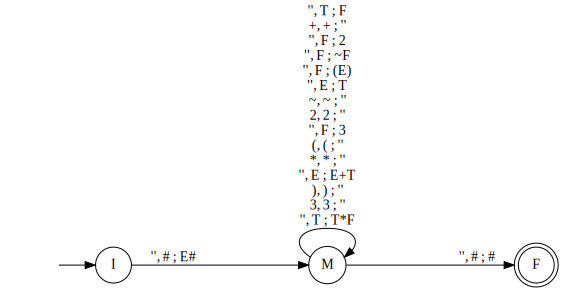

In [8]:
# Parsing an arithmetic expression
pdaE = md2mc('''PDA

!!-- The grammar E -> E+E | E*E | (E) | ~E | 2 | 3 is ambiguous!
!!-- Two parse trees!
!!-- This is your Asg Part 2b

!!-- STRATIFIED GRAMMAR for expressions avoids ambiguity - below!
!!E -> E+T | T
!!T -> T*F | F
!!F -> 2 | 3 | ~F | (E)
!!-- Direct-converted PDA from above CFG
I : '', #  ; E#  -> M
M : '', E  ; E+T -> M
M : '', E  ; T   -> M
M : '', T  ; T*F -> M
M : '', T  ; F   -> M
M : '', F  ; 2   -> M
M : '', F  ; 3   -> M
M : '', F  ; ~F  -> M
M : '', F  ; (E) -> M
M : ~,  ~  ; ''  -> M
M : 2,  2  ; ''  -> M
M : 3,  3  ; ''  -> M
M : (,  (  ; ''  -> M
M : ),  )  ; ''  -> M
M : +,  +  ; ''  -> M
M : *,  *  ; ''  -> M
M : '', #  ; #   -> F
'''
)

dotObj_pda(pdaE, True)

### TODO: Convert and compare Jove with the Automaton Simulator

As before. Include a link encoding your saved machine.

In [5]:
explore_pda('2*3+2', pdaE)

String 2*3+2 accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('I', '2*3+2', '#')
->  ('M', '2*3+2', 'E#')
->  ('M', '2*3+2', 'E+T#')
->  ('M', '2*3+2', 'T+T#')
->  ('M', '2*3+2', 'T*F+T#')
->  ('M', '2*3+2', 'F*F+T#')
->  ('M', '2*3+2', '2*F+T#')
->  ('M', '*3+2', '*F+T#')
->  ('M', '3+2', 'F+T#')
->  ('M', '3+2', '3+T#')
->  ('M', '+2', '+T#')
->  ('M', '2', 'T#')
->  ('M', '2', 'F#')
->  ('M', '2', '2#')
->  ('M', '', '#')
->  ('F', '', '#') .


https://automatonsimulator.com/#%7B%22type%22%3A%22PDA%22%2C%22pda%22%3A%7B%22transitions%22%3A%7B%22start%22%3A%7B%22%22%3A%7B%22%22%3A%5B%7B%22state%22%3A%22s0%22%2C%22stackPushChar%22%3A%22%23%22%7D%5D%7D%7D%2C%22s0%22%3A%7B%22%22%3A%7B%22%22%3A%5B%7B%22state%22%3A%22s1%22%2C%22stackPushChar%22%3A%22E%22%7D%5D%7D%7D%2C%22s1%22%3A%7B%222%22%3A%7B%222%22%3A%5B%7B%22state%22%3A%22s1%22%2C%22stackPushChar%22%3A%22%22%7D%5D%7D%2C%22%22%3A%7B%22T%22%3A%5B%7B%22state%22%3A%22s1%22%2C%22stackPushChar%22%3A%22F%22%7D%5D%2C%22F%22%3A%5B%7B%22state%22%3A%22s1%22%2C%22stackPushChar%22%3A%222%22%7D%2C%7B%22state%22%3A%22s2%22%2C%22stackPushChar%22%3A%22F%22%7D%2C%7B%22state%22%3A%22s3%22%2C%22stackPushChar%22%3A%22)%22%7D%2C%7B%22state%22%3A%22s1%22%2C%22stackPushChar%22%3A%223%22%7D%2C%7B%22state%22%3A%22s1%22%2C%22stackPushChar%22%3A%223%22%7D%5D%2C%22E%22%3A%5B%7B%22state%22%3A%22s1%22%2C%22stackPushChar%22%3A%22T%22%7D%5D%2C%22%22%3A%5B%7B%22state%22%3A%22s5%22%2C%22stackPushChar%22%3A%22%22%7D%5D%7D%2C%22%2B%22%3A%7B%22%2B%22%3A%5B%7B%22state%22%3A%22s1%22%2C%22stackPushChar%22%3A%22%22%7D%5D%7D%2C%22~%22%3A%7B%22~%22%3A%5B%7B%22state%22%3A%22s1%22%2C%22stackPushChar%22%3A%22%22%7D%5D%7D%2C%22(%22%3A%7B%22(%22%3A%5B%5D%7D%7D%2C%22s2%22%3A%7B%22%22%3A%7B%22%22%3A%5B%7B%22state%22%3A%22s1%22%2C%22stackPushChar%22%3A%22~%22%7D%5D%7D%7D%2C%22s3%22%3A%7B%22%22%3A%7B%22%22%3A%5B%7B%22state%22%3A%22s4%22%2C%22stackPushChar%22%3A%22E%22%7D%5D%7D%7D%2C%22s4%22%3A%7B%22%22%3A%7B%22%22%3A%5B%7B%22state%22%3A%22s1%22%2C%22stackPushChar%22%3A%22(%22%7D%5D%7D%7D%2C%22s5%22%3A%7B%223%22%3A%7B%223%22%3A%5B%7B%22state%22%3A%22s5%22%2C%22stackPushChar%22%3A%22%22%7D%5D%7D%2C%22%22%3A%7B%22%22%3A%5B%7B%22state%22%3A%22s1%22%2C%22stackPushChar%22%3A%22%22%7D%5D%2C%22F%22%3A%5B%7B%22state%22%3A%22s5%22%2C%22stackPushChar%22%3A%223%22%7D%5D%2C%22E%22%3A%5B%7B%22state%22%3A%22s6%22%2C%22stackPushChar%22%3A%22T%22%7D%5D%2C%22T%22%3A%5B%7B%22state%22%3A%22s8%22%2C%22stackPushChar%22%3A%22F%22%7D%5D%2C%22%23%22%3A%5B%7B%22state%22%3A%22s10%22%2C%22stackPushChar%22%3A%22%23%22%7D%5D%7D%2C%22(%22%3A%7B%22(%22%3A%5B%7B%22state%22%3A%22s5%22%2C%22stackPushChar%22%3A%22%22%7D%5D%7D%2C%22*%22%3A%7B%22*%22%3A%5B%7B%22state%22%3A%22s5%22%2C%22stackPushChar%22%3A%22%22%7D%5D%7D%2C%22)%22%3A%7B%22)%22%3A%5B%7B%22state%22%3A%22s5%22%2C%22stackPushChar%22%3A%22%22%7D%5D%7D%7D%2C%22s6%22%3A%7B%22%22%3A%7B%22%22%3A%5B%7B%22state%22%3A%22s7%22%2C%22stackPushChar%22%3A%22%2B%22%7D%5D%7D%7D%2C%22s7%22%3A%7B%22%22%3A%7B%22%22%3A%5B%7B%22state%22%3A%22s5%22%2C%22stackPushChar%22%3A%22E%22%7D%5D%7D%7D%2C%22s8%22%3A%7B%22%22%3A%7B%22%22%3A%5B%7B%22state%22%3A%22s9%22%2C%22stackPushChar%22%3A%22*%22%7D%5D%7D%7D%2C%22s9%22%3A%7B%22%22%3A%7B%22%22%3A%5B%7B%22state%22%3A%22s5%22%2C%22stackPushChar%22%3A%22T%22%7D%5D%7D%7D%7D%2C%22startState%22%3A%22start%22%2C%22acceptStates%22%3A%5B%22s10%22%5D%7D%2C%22states%22%3A%7B%22start%22%3A%7B%7D%2C%22s0%22%3A%7B%22top%22%3A321%2C%22left%22%3A185%2C%22displayId%22%3A%22s0%22%7D%2C%22s1%22%3A%7B%22top%22%3A322%2C%22left%22%3A356%2C%22displayId%22%3A%22s1%22%7D%2C%22s2%22%3A%7B%22top%22%3A411%2C%22left%22%3A246%2C%22displayId%22%3A%22s2%22%7D%2C%22s3%22%3A%7B%22top%22%3A398%2C%22left%22%3A430%2C%22displayId%22%3A%22s3%22%7D%2C%22s5%22%3A%7B%22top%22%3A310%2C%22left%22%3A614%2C%22displayId%22%3A%22s5%22%7D%2C%22s4%22%3A%7B%22top%22%3A469%2C%22left%22%3A332%2C%22displayId%22%3A%22s4%22%7D%2C%22s6%22%3A%7B%22top%22%3A401%2C%22left%22%3A666%2C%22displayId%22%3A%22s6%22%7D%2C%22s8%22%3A%7B%22top%22%3A212%2C%22left%22%3A814%2C%22displayId%22%3A%22s8%22%7D%2C%22s10%22%3A%7B%22isAccept%22%3Atrue%2C%22top%22%3A315%2C%22left%22%3A836%2C%22displayId%22%3A%22s10%22%7D%2C%22s7%22%3A%7B%22top%22%3A456%2C%22left%22%3A588%2C%22displayId%22%3A%22s7%22%7D%2C%22s9%22%3A%7B%22top%22%3A106%2C%22left%22%3A697%2C%22displayId%22%3A%22s9%22%7D%7D%2C%22transitions%22%3A%5B%7B%22stateA%22%3A%22start%22%2C%22label%22%3A%22%CF%B5%2C%CF%B5%2C%23%22%2C%22stateB%22%3A%22s0%22%7D%2C%7B%22stateA%22%3A%22s0%22%2C%22label%22%3A%22%CF%B5%2C%CF%B5%2CE%22%2C%22stateB%22%3A%22s1%22%7D%2C%7B%22stateA%22%3A%22s1%22%2C%22label%22%3A%222%2C2%2C%CF%B5%22%2C%22stateB%22%3A%22s1%22%7D%2C%7B%22stateA%22%3A%22s1%22%2C%22label%22%3A%22%CF%B5%2CT%2CF%22%2C%22stateB%22%3A%22s1%22%7D%2C%7B%22stateA%22%3A%22s1%22%2C%22label%22%3A%22%CF%B5%2CF%2C2%22%2C%22stateB%22%3A%22s1%22%7D%2C%7B%22stateA%22%3A%22s1%22%2C%22label%22%3A%22%CF%B5%2CF%2CF%22%2C%22stateB%22%3A%22s2%22%7D%2C%7B%22stateA%22%3A%22s1%22%2C%22label%22%3A%22%CF%B5%2CF%2C)%22%2C%22stateB%22%3A%22s3%22%7D%2C%7B%22stateA%22%3A%22s1%22%2C%22label%22%3A%22%CF%B5%2CF%2C3%22%2C%22stateB%22%3A%22s1%22%7D%2C%7B%22stateA%22%3A%22s1%22%2C%22label%22%3A%22%CF%B5%2CF%2C3%22%2C%22stateB%22%3A%22s1%22%7D%2C%7B%22stateA%22%3A%22s1%22%2C%22label%22%3A%22%CF%B5%2CE%2CT%22%2C%22stateB%22%3A%22s1%22%7D%2C%7B%22stateA%22%3A%22s1%22%2C%22label%22%3A%22%CF%B5%2C%CF%B5%2C%CF%B5%22%2C%22stateB%22%3A%22s5%22%7D%2C%7B%22stateA%22%3A%22s1%22%2C%22label%22%3A%22%2B%2C%2B%2C%CF%B5%22%2C%22stateB%22%3A%22s1%22%7D%2C%7B%22stateA%22%3A%22s1%22%2C%22label%22%3A%22~%2C~%2C%CF%B5%22%2C%22stateB%22%3A%22s1%22%7D%2C%7B%22stateA%22%3A%22s2%22%2C%22label%22%3A%22%CF%B5%2C%CF%B5%2C~%22%2C%22stateB%22%3A%22s1%22%7D%2C%7B%22stateA%22%3A%22s3%22%2C%22label%22%3A%22%CF%B5%2C%CF%B5%2CE%22%2C%22stateB%22%3A%22s4%22%7D%2C%7B%22stateA%22%3A%22s4%22%2C%22label%22%3A%22%CF%B5%2C%CF%B5%2C(%22%2C%22stateB%22%3A%22s1%22%7D%2C%7B%22stateA%22%3A%22s5%22%2C%22label%22%3A%223%2C3%2C%CF%B5%22%2C%22stateB%22%3A%22s5%22%7D%2C%7B%22stateA%22%3A%22s5%22%2C%22label%22%3A%22%CF%B5%2C%CF%B5%2C%CF%B5%22%2C%22stateB%22%3A%22s1%22%7D%2C%7B%22stateA%22%3A%22s5%22%2C%22label%22%3A%22%CF%B5%2CF%2C3%22%2C%22stateB%22%3A%22s5%22%7D%2C%7B%22stateA%22%3A%22s5%22%2C%22label%22%3A%22%CF%B5%2CE%2CT%22%2C%22stateB%22%3A%22s6%22%7D%2C%7B%22stateA%22%3A%22s5%22%2C%22label%22%3A%22%CF%B5%2CT%2CF%22%2C%22stateB%22%3A%22s8%22%7D%2C%7B%22stateA%22%3A%22s5%22%2C%22label%22%3A%22%CF%B5%2C%23%2C%23%22%2C%22stateB%22%3A%22s10%22%7D%2C%7B%22stateA%22%3A%22s5%22%2C%22label%22%3A%22(%2C(%2C%CF%B5%22%2C%22stateB%22%3A%22s5%22%7D%2C%7B%22stateA%22%3A%22s5%22%2C%22label%22%3A%22*%2C*%2C%CF%B5%22%2C%22stateB%22%3A%22s5%22%7D%2C%7B%22stateA%22%3A%22s5%22%2C%22label%22%3A%22)%2C)%2C%CF%B5%22%2C%22stateB%22%3A%22s5%22%7D%2C%7B%22stateA%22%3A%22s6%22%2C%22label%22%3A%22%CF%B5%2C%CF%B5%2C%2B%22%2C%22stateB%22%3A%22s7%22%7D%2C%7B%22stateA%22%3A%22s7%22%2C%22label%22%3A%22%CF%B5%2C%CF%B5%2CE%22%2C%22stateB%22%3A%22s5%22%7D%2C%7B%22stateA%22%3A%22s8%22%2C%22label%22%3A%22%CF%B5%2C%CF%B5%2C*%22%2C%22stateB%22%3A%22s9%22%7D%2C%7B%22stateA%22%3A%22s9%22%2C%22label%22%3A%22%CF%B5%2C%CF%B5%2CT%22%2C%22stateB%22%3A%22s5%22%7D%5D%2C%22bulkTests%22%3A%7B%22accept%22%3A%22%22%2C%22reject%22%3A%22%22%7D%7D

### ID Sequence to Derivation Sequence to Implied Parse-Tree

```
     ID SEQUENCE             -- FORMING EACH STEP of DERIVATION SEQUENCE
=================================================================================  
->  ('I', '2*3+2', '#')      -- 
->  ('M', '2*3+2', 'E#')     -- E        (pushed)
->  ('M', '2*3+2', 'E+T#')   -- => E+T   (removed E; pushed E+T)
->  ('M', '2*3+2', 'T+T#')   -- => T+T   (pushed T)
->  ('M', '2*3+2', 'T*F+T#') -- => T*F+T (removed T, pushed T*F)
->  ('M', '2*3+2', 'F*F+T#') -- => F*F+T (removed T, pushed F)
->  ('M', '2*3+2', '2*F+T#') -- => 2*F+T (removed F, pushed 2)
->  ('M', '*3+2', '*F+T#')   -- => leaf-match of 2, no new push, deriv seq same as before
->  ('M', '3+2', 'F+T#')     -- => leaf-match of *, no new push. NOTICE "*" DONE BEFORE +
->  ('M', '3+2', '3+T#')     -- => 2*3+T (removed F, pushed 3)
->  ('M', '+2', '+T#')       -- => leaf-match of 3, no new push
->  ('M', '2', 'T#')         -- => leaf-match of +, no new push
->  ('M', '2', 'F#')         -- => 2*3+F (removed T, pushed F)
->  ('M', '2', '2#')         -- => 2*3+2 (removed F, pushed 2)
->  ('M', '', '#')           -- => leaf-match of 2, no new push
->  ('F', '', '#') .         --
```


### TODO: Finish --- Derivation sequence is


```E => E+T => T+T => T*F+T => F*F+T => 2*F+T => ... 2*3+2``` (You flesh out.)

E => E+T => T+T => T\*F+T => F\*F+T => 2\*F+T =>

2\*3+T => 2*3+F =>

 => 2\*3+2

### TODO Draw the Parse Tree from this DS.

Use a neat drawing tool, and put the source and the PNG here.

Note how * is done before +.

## TODO Study Context-Free Grammars Further



1. Learn how to "run" CFGs by directly converting them to PDA, and running those PDA.
2. Watch YouTube videos as presented "in context" below.

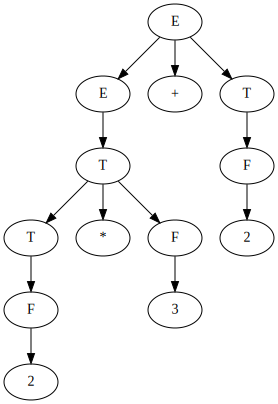

In [48]:
# Matthew, Clara, and I based this on the previous DOT drawing.
# Create Digraph object
dot2 = Digraph()
# Add nodes
dot2.node('1', label='E')
dot2.node('2', label='E')
dot2.node('3', label='+')
dot2.node('4', label='T')
dot2.node('5', label='T')
dot2.node('6', label='T')
dot2.node('7', label='*')
dot2.node('8', label='F')
dot2.node('9', label='F')
dot2.node('a', label='2')
dot2.node('b', label='3')
dot2.node('c', label='F')
dot2.node('d', label='2')


# Add edges
dot2.edges(['12', '13', '14', '25', '56', '57', '58', '69', '9a','8b', '4c', 'cd'])
# Visualize the graph
dot2

#### CFG Basics and How to Directly Parse Them Using PDA

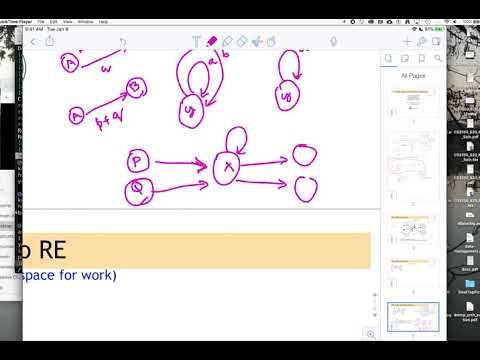

In [9]:
from IPython.display import YouTubeVideo
YouTubeVideo('bymg3MDe6Y4')

Direct path: https://youtu.be/bymg3MDe6Y4 (31 min mark).

From about the 30-minute mark, the video discusses the grammar:

S -> aSa | bSb | epsilon,

for $\{w w^R \;:\; w \in \{a, b\}^* \}$.

### The Next Video

(Direct path https://youtu.be/N5wQovKIZGM) discusses:
1. Consistency/Completeness
2. Linearity
3. Ambiguity

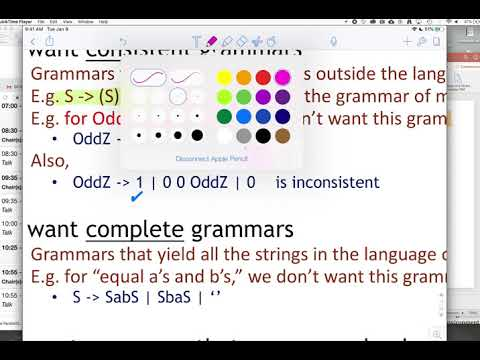

In [10]:
from IPython.display import YouTubeVideo
YouTubeVideo('N5wQovKIZGM')

### TODO Run the "Direct Simulation of CFG from PDA"

for the above grammar. Notice how each grammar rule is encoded DIRECTLY as a PDA transition.

These PDA always have the *SAME* I to W and W to F moves ...

Only the W to W moves vary; and here, they have transitions that go by the CFG.

There are always $a \in \Sigma$ transitions that drain every $a \in \Sigma$, matching it with an incoming $a$.

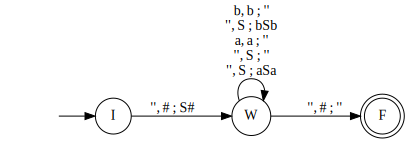

In [12]:
wwR = md2mc('''
PDA
!!-- The CFG to be simulated
!!-- S -> aSa | bSb | ''

!!-- This move is the same for any CFG
I : '',#; S# -> W

!!-- These moves imitate the CFG productions directly
W : '',S; aSa -> W
W : '',S; bSb -> W
W : '',S; ''  -> W

!!-- Transitions for every member of Sigma
W : a,a; '' -> W
W : b,b; '' -> W

!!-- This transition is also there for every CFG
W : '',#; ''   -> F
''')
dotObj_pda(wwR, FuseEdges=True)

In [13]:
explore_pda('aabaabaa', wwR)

String aabaabaa accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('F', '', '')
Reached as follows:
->  ('I', 'aabaabaa', '#')
->  ('W', 'aabaabaa', 'S#')
->  ('W', 'aabaabaa', 'aSa#')
->  ('W', 'abaabaa', 'Sa#')
->  ('W', 'abaabaa', 'aSaa#')
->  ('W', 'baabaa', 'Saa#')
->  ('W', 'baabaa', 'bSbaa#')
->  ('W', 'aabaa', 'Sbaa#')
->  ('W', 'aabaa', 'aSabaa#')
->  ('W', 'abaa', 'Sabaa#')
->  ('W', 'abaa', 'abaa#')
->  ('W', 'baa', 'baa#')
->  ('W', 'aa', 'aa#')
->  ('W', 'a', 'a#')
->  ('W', '', '#')
->  ('F', '', '') .


### Animate with Jove and Alternative

In [14]:
from jove.AnimatePDA import *
AnimatePDA(wwR, FuseEdges=True)
display(HTML('<link rel="stylesheet" href="//stackpath.bootstrapcdn.com/font-awesome/4.7.0/css/font-awesome.min.css"/>'))


 "help(AnimatePDA)" gives you info on how to use animations with PDA 


Do this and all the rest with the alternative Automaton Simulator also. https://automatonsimulator.com

https://automatonsimulator.com/#%7B%22type%22%3A%22PDA%22%2C%22pda%22%3A%7B%22transitions%22%3A%7B%22start%22%3A%7B%22%22%3A%7B%22%22%3A%5B%7B%22state%22%3A%22s0%22%2C%22stackPushChar%22%3A%22%23%22%7D%5D%7D%7D%2C%22s0%22%3A%7B%22%22%3A%7B%22%22%3A%5B%7B%22state%22%3A%22s1%22%2C%22stackPushChar%22%3A%22S%22%7D%5D%7D%7D%2C%22s1%22%3A%7B%22b%22%3A%7B%22b%22%3A%5B%7B%22state%22%3A%22s1%22%2C%22stackPushChar%22%3A%22%22%7D%5D%7D%2C%22%22%3A%7B%22S%22%3A%5B%7B%22state%22%3A%22s3%22%2C%22stackPushChar%22%3A%22b%22%7D%2C%7B%22state%22%3A%22s1%22%2C%22stackPushChar%22%3A%22%22%7D%2C%7B%22state%22%3A%22s5%22%2C%22stackPushChar%22%3A%22a%22%7D%5D%2C%22%23%22%3A%5B%7B%22state%22%3A%22s7%22%2C%22stackPushChar%22%3A%22%22%7D%5D%7D%2C%22a%22%3A%7B%22a%22%3A%5B%7B%22state%22%3A%22s1%22%2C%22stackPushChar%22%3A%22%22%7D%5D%7D%7D%2C%22s3%22%3A%7B%22%22%3A%7B%22%22%3A%5B%7B%22state%22%3A%22s4%22%2C%22stackPushChar%22%3A%22S%22%7D%5D%7D%7D%2C%22s4%22%3A%7B%22%22%3A%7B%22%22%3A%5B%7B%22state%22%3A%22s1%22%2C%22stackPushChar%22%3A%22b%22%7D%5D%7D%7D%2C%22s5%22%3A%7B%22%22%3A%7B%22%22%3A%5B%7B%22state%22%3A%22s6%22%2C%22stackPushChar%22%3A%22S%22%7D%5D%7D%7D%2C%22s6%22%3A%7B%22%22%3A%7B%22%22%3A%5B%7B%22state%22%3A%22s1%22%2C%22stackPushChar%22%3A%22a%22%7D%5D%7D%7D%7D%2C%22startState%22%3A%22start%22%2C%22acceptStates%22%3A%5B%22s7%22%5D%7D%2C%22states%22%3A%7B%22start%22%3A%7B%7D%2C%22s0%22%3A%7B%22top%22%3A316%2C%22left%22%3A188%2C%22displayId%22%3A%22s0%22%7D%2C%22s1%22%3A%7B%22top%22%3A318%2C%22left%22%3A356%2C%22displayId%22%3A%22s1%22%7D%2C%22s3%22%3A%7B%22top%22%3A496%2C%22left%22%3A241%2C%22displayId%22%3A%22s2%22%7D%2C%22s5%22%3A%7B%22top%22%3A391%2C%22left%22%3A465%2C%22displayId%22%3A%22s5%22%7D%2C%22s7%22%3A%7B%22isAccept%22%3Atrue%2C%22top%22%3A291%2C%22left%22%3A585%2C%22displayId%22%3A%22s7%22%7D%2C%22s4%22%3A%7B%22top%22%3A412%2C%22left%22%3A198%2C%22displayId%22%3A%22s3%22%7D%2C%22s6%22%3A%7B%22top%22%3A478%2C%22left%22%3A431%2C%22displayId%22%3A%22s6%22%7D%7D%2C%22transitions%22%3A%5B%7B%22stateA%22%3A%22start%22%2C%22label%22%3A%22%CF%B5%2C%CF%B5%2C%23%22%2C%22stateB%22%3A%22s0%22%7D%2C%7B%22stateA%22%3A%22s0%22%2C%22label%22%3A%22%CF%B5%2C%CF%B5%2CS%22%2C%22stateB%22%3A%22s1%22%7D%2C%7B%22stateA%22%3A%22s1%22%2C%22label%22%3A%22b%2Cb%2C%CF%B5%22%2C%22stateB%22%3A%22s1%22%7D%2C%7B%22stateA%22%3A%22s1%22%2C%22label%22%3A%22%CF%B5%2CS%2Cb%22%2C%22stateB%22%3A%22s3%22%7D%2C%7B%22stateA%22%3A%22s1%22%2C%22label%22%3A%22%CF%B5%2CS%2C%CF%B5%22%2C%22stateB%22%3A%22s1%22%7D%2C%7B%22stateA%22%3A%22s1%22%2C%22label%22%3A%22%CF%B5%2CS%2Ca%22%2C%22stateB%22%3A%22s5%22%7D%2C%7B%22stateA%22%3A%22s1%22%2C%22label%22%3A%22%CF%B5%2C%23%2C%CF%B5%22%2C%22stateB%22%3A%22s7%22%7D%2C%7B%22stateA%22%3A%22s1%22%2C%22label%22%3A%22a%2Ca%2C%CF%B5%22%2C%22stateB%22%3A%22s1%22%7D%2C%7B%22stateA%22%3A%22s3%22%2C%22label%22%3A%22%CF%B5%2C%CF%B5%2CS%22%2C%22stateB%22%3A%22s4%22%7D%2C%7B%22stateA%22%3A%22s4%22%2C%22label%22%3A%22%CF%B5%2C%CF%B5%2Cb%22%2C%22stateB%22%3A%22s1%22%7D%2C%7B%22stateA%22%3A%22s5%22%2C%22label%22%3A%22%CF%B5%2C%CF%B5%2CS%22%2C%22stateB%22%3A%22s6%22%7D%2C%7B%22stateA%22%3A%22s6%22%2C%22label%22%3A%22%CF%B5%2C%CF%B5%2Ca%22%2C%22stateB%22%3A%22s1%22%7D%5D%2C%22bulkTests%22%3A%7B%22accept%22%3A%22%22%2C%22reject%22%3A%22%22%7D%7D

### Animation Panel for all Machines (choose PDA)

### You may do the above animation here.
#### Access the PDA panel and key-in the definition of wwR in there.

In [15]:
from jove.JoveEditor import *
JoveEditor(examples=True)
display(HTML('<link rel="stylesheet" href="//stackpath.bootstrapcdn.com/font-awesome/4.7.0/css/font-awesome.min.css"/>'))


 "help(JoveEditor)" gives you info on the generic animation panel that animates all machines. 


The explore_pda call below fails because the string is not of the form $ww^R$. Here you must use ```explore_pda```, not animation, to further investigate.

In [16]:
explore_pda('aabaaaba', wwR)

String aabaaaba rejected by your PDA :-(
Visited states are:
{('W', 'aaba', 'bSbabaa#'), ('W', 'ba', 'aSaaaabaa#'), ('W', 'aabaaaba', 'bSb#'), ('W', 'a', 'Sbaaabaa#'), ('W', 'baaaba', '#'), ('W', 'abaaaba', 'bSba#'), ('F', 'baaaba', ''), ('W', '', 'Sabaaabaa#'), ('W', 'baaaba', 'aa#'), ('W', 'aba', 'aabaa#'), ('W', 'abaaaba', 'Sa#'), ('W', 'abaaaba', 'aSaa#'), ('W', 'a', 'bSbbaaabaa#'), ('W', 'ba', 'Saaabaa#'), ('W', 'aba', 'Saabaa#'), ('I', 'aabaaaba', '#'), ('W', 'aba', 'bSbaabaa#'), ('W', 'baaaba', 'Saa#'), ('W', 'baaaba', 'bSbaa#'), ('W', 'ba', 'bSbaaabaa#'), ('W', 'aaaba', 'Sbaa#'), ('W', 'abaaaba', 'a#'), ('W', 'aaba', 'abaa#'), ('W', 'a', 'baaabaa#'), ('W', 'ba', 'abaa#'), ('W', 'aaba', 'Sabaa#'), ('W', 'aabaaaba', 'S#'), ('W', 'aabaaaba', '#'), ('W', 'aba', 'baa#'), ('F', 'aabaaaba', ''), ('W', 'aaba', 'aSaabaa#'), ('W', '', 'abaaabaa#'), ('W', 'aabaaaba', 'aSa#'), ('W', 'ba', 'aaabaa#'), ('W', 'aba', 'aSaaabaa#'), ('W', 'aaaba', 'baa#'), ('W', '', 'bSbabaaabaa#'), ('W', 'aaaba

### An RE Grammar and its PDA Encoding

Observe the number of possible parses.

This is a highly ambiguous grammar because there are many parses for the same input.

In [17]:
repda = md2mc('''PDA
!!R -> R R | R + R | R* | ( R ) | 0 | 1 | e
I : '', #  ; R#  -> M
M : '', R  ; RR  -> M
M : '', R  ; R+R -> M
M : '', R  ; R*  -> M
M : '', R  ; (R) -> M
M : '', R  ; 0   -> M
M : '', R  ; 1   -> M
M : '', R  ; e   -> M
M : 0,  0  ; ''  -> M
M : 1,  1  ; ''  -> M
M : (,  (  ; ''  -> M
M : ),  )  ; ''  -> M
M : +,  +  ; ''  -> M
M : e,  e  ; ''  -> M
M : '', #  ; #   -> F
'''
)

In [18]:
repda

{'Delta': {('I', '', '#'): {('M', 'R#')},
  ('M', '', '#'): {('F', '#')},
  ('M', '', 'R'): {('M', '(R)'),
   ('M', '0'),
   ('M', '1'),
   ('M', 'R*'),
   ('M', 'R+R'),
   ('M', 'RR'),
   ('M', 'e')},
  ('M', '(', '('): {('M', '')},
  ('M', ')', ')'): {('M', '')},
  ('M', '+', '+'): {('M', '')},
  ('M', '0', '0'): {('M', '')},
  ('M', '1', '1'): {('M', '')},
  ('M', 'e', 'e'): {('M', '')}},
 'F': {'F'},
 'Gamma': {'#', '(', ')', '*', '+', '0', '1', 'R', 'e'},
 'Q': {'F', 'I', 'M'},
 'Sigma': {'(', ')', '+', '0', '1', 'e'},
 'q0': 'I',
 'z0': '#'}

In [20]:
DO_repda = dotObj_pda(repda, FuseEdges=True)

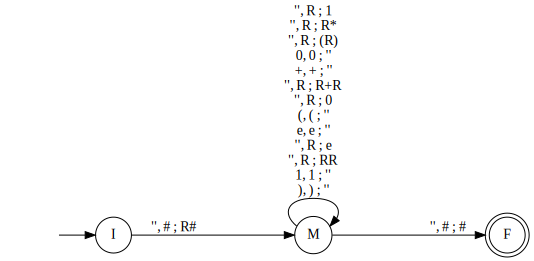

In [21]:
DO_repda

In [22]:
explore_pda("0", repda, STKMAX=4)

String 0 accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('I', '0', '#')
->  ('M', '0', 'R#')
->  ('M', '0', '0#')
->  ('M', '', '#')
->  ('F', '', '#') .


In [23]:
explore_pda("00", repda)

String 00 accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('I', '00', '#')
->  ('M', '00', 'R#')
->  ('M', '00', 'RR#')
->  ('M', '00', '0R#')
->  ('M', '0', 'R#')
->  ('M', '0', '0#')
->  ('M', '', '#')
->  ('F', '', '#') .


In [27]:
explore_pda("(0)", repda)

String (0) accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('I', '(0)', '#')
->  ('M', '(0)', 'R#')
->  ('M', '(0)', '(R)#')
->  ('M', '0)', 'R)#')
->  ('M', '0)', '0)#')
->  ('M', ')', ')#')
->  ('M', '', '#')
->  ('F', '', '#') .


In [26]:
explore_pda("(00)", repda)

String (00) accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('I', '(00)', '#')
->  ('M', '(00)', 'R#')
->  ('M', '(00)', '(R)#')
->  ('M', '00)', 'R)#')
->  ('M', '00)', 'RR)#')
->  ('M', '00)', '0R)#')
->  ('M', '0)', 'R)#')
->  ('M', '0)', '0)#')
->  ('M', ')', ')#')
->  ('M', '', '#')
->  ('F', '', '#') .


In [28]:
explore_pda("(0)(0)", repda)

String (0)(0) accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('I', '(0)(0)', '#')
->  ('M', '(0)(0)', 'R#')
->  ('M', '(0)(0)', 'RR#')
->  ('M', '(0)(0)', '(R)R#')
->  ('M', '0)(0)', 'R)R#')
->  ('M', '0)(0)', '0)R#')
->  ('M', ')(0)', ')R#')
->  ('M', '(0)', 'R#')
->  ('M', '(0)', '(R)#')
->  ('M', '0)', 'R)#')
->  ('M', '0)', '0)#')
->  ('M', ')', ')#')
->  ('M', '', '#')
->  ('F', '', '#') .


In [29]:
explore_pda("0+0", repda, STKMAX=3)

String 0+0 accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('I', '0+0', '#')
->  ('M', '0+0', 'R#')
->  ('M', '0+0', 'R+R#')
->  ('M', '0+0', '0+R#')
->  ('M', '+0', '+R#')
->  ('M', '0', 'R#')
->  ('M', '0', '0#')
->  ('M', '', '#')
->  ('F', '', '#') .


In [30]:
explore_pda("(0)+(0)", repda)

String (0)+(0) accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('I', '(0)+(0)', '#')
->  ('M', '(0)+(0)', 'R#')
->  ('M', '(0)+(0)', 'R+R#')
->  ('M', '(0)+(0)', '(R)+R#')
->  ('M', '0)+(0)', 'R)+R#')
->  ('M', '0)+(0)', '0)+R#')
->  ('M', ')+(0)', ')+R#')
->  ('M', '+(0)', '+R#')
->  ('M', '(0)', 'R#')
->  ('M', '(0)', '(R)#')
->  ('M', '0)', 'R)#')
->  ('M', '0)', '0)#')
->  ('M', ')', ')#')
->  ('M', '', '#')
->  ('F', '', '#') .


In [31]:
explore_pda("00+0", repda)

String 00+0 accepted by your PDA in 2 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('I', '00+0', '#')
->  ('M', '00+0', 'R#')
->  ('M', '00+0', 'R+R#')
->  ('M', '00+0', 'RR+R#')
->  ('M', '00+0', '0R+R#')
->  ('M', '0+0', 'R+R#')
->  ('M', '0+0', '0+R#')
->  ('M', '+0', '+R#')
->  ('M', '0', 'R#')
->  ('M', '0', '0#')
->  ('M', '', '#')
->  ('F', '', '#') .
Final state  ('F', '', '#')
Reached as follows:
->  ('I', '00+0', '#')
->  ('M', '00+0', 'R#')
->  ('M', '00+0', 'RR#')
->  ('M', '00+0', '0R#')
->  ('M', '0+0', 'R#')
->  ('M', '0+0', 'R+R#')
->  ('M', '0+0', '0+R#')
->  ('M', '+0', '+R#')
->  ('M', '0', 'R#')
->  ('M', '0', '0#')
->  ('M', '', '#')
->  ('F', '', '#') .


In [32]:
explore_pda("000", repda, STKMAX=3)

String 000 accepted by your PDA in 2 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('I', '000', '#')
->  ('M', '000', 'R#')
->  ('M', '000', 'RR#')
->  ('M', '000', '0R#')
->  ('M', '00', 'R#')
->  ('M', '00', 'RR#')
->  ('M', '00', '0R#')
->  ('M', '0', 'R#')
->  ('M', '0', '0#')
->  ('M', '', '#')
->  ('F', '', '#') .
Final state  ('F', '', '#')
Reached as follows:
->  ('I', '000', '#')
->  ('M', '000', 'R#')
->  ('M', '000', 'RR#')
->  ('M', '000', 'RRR#')
->  ('M', '000', '0RR#')
->  ('M', '00', 'RR#')
->  ('M', '00', '0R#')
->  ('M', '0', 'R#')
->  ('M', '0', '0#')
->  ('M', '', '#')
->  ('F', '', '#') .


In [33]:
explore_pda("00+00", repda, STKMAX=4)

String 00+00 accepted by your PDA in 2 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('I', '00+00', '#')
->  ('M', '00+00', 'R#')
->  ('M', '00+00', 'R+R#')
->  ('M', '00+00', 'RR+R#')
->  ('M', '00+00', '0R+R#')
->  ('M', '0+00', 'R+R#')
->  ('M', '0+00', '0+R#')
->  ('M', '+00', '+R#')
->  ('M', '00', 'R#')
->  ('M', '00', 'RR#')
->  ('M', '00', '0R#')
->  ('M', '0', 'R#')
->  ('M', '0', '0#')
->  ('M', '', '#')
->  ('F', '', '#') .
Final state  ('F', '', '#')
Reached as follows:
->  ('I', '00+00', '#')
->  ('M', '00+00', 'R#')
->  ('M', '00+00', 'RR#')
->  ('M', '00+00', '0R#')
->  ('M', '0+00', 'R#')
->  ('M', '0+00', 'R+R#')
->  ('M', '0+00', '0+R#')
->  ('M', '+00', '+R#')
->  ('M', '00', 'R#')
->  ('M', '00', 'RR#')
->  ('M', '00', '0R#')
->  ('M', '0', 'R#')
->  ('M', '0', '0#')
->  ('M', '', '#')
->  ('F', '', '#') .


In [34]:
explore_pda("00+00", repda, STKMAX=5)

String 00+00 accepted by your PDA in 5 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('I', '00+00', '#')
->  ('M', '00+00', 'R#')
->  ('M', '00+00', 'R+R#')
->  ('M', '00+00', 'RR+R#')
->  ('M', '00+00', '0R+R#')
->  ('M', '0+00', 'R+R#')
->  ('M', '0+00', '0+R#')
->  ('M', '+00', '+R#')
->  ('M', '00', 'R#')
->  ('M', '00', 'RR#')
->  ('M', '00', '0R#')
->  ('M', '0', 'R#')
->  ('M', '0', '0#')
->  ('M', '', '#')
->  ('F', '', '#') .
Final state  ('F', '', '#')
Reached as follows:
->  ('I', '00+00', '#')
->  ('M', '00+00', 'R#')
->  ('M', '00+00', 'RR#')
->  ('M', '00+00', 'R+RR#')
->  ('M', '00+00', 'RR+RR#')
->  ('M', '00+00', '0R+RR#')
->  ('M', '0+00', 'R+RR#')
->  ('M', '0+00', '0+RR#')
->  ('M', '+00', '+RR#')
->  ('M', '00', 'RR#')
->  ('M', '00', '0R#')
->  ('M', '0', 'R#')
->  ('M', '0', '0#')
->  ('M', '', '#')
->  ('F', '', '#') .
Final state  ('F', '', '#')
Reached as follows:
->  ('I', '00+00', '#')
->  ('M', '00+00', 'R#')
->  ('M', '0

### PDA for Well-Balanced Parentheses

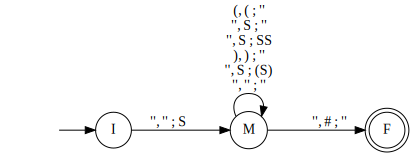

In [35]:
brpda1 = md2mc('''PDA

!!-- The CFG simulated is
!!-- S -> (S)|SS|''

!!-- Initial move to state M (was W above)
 I : '', '' ; S     -> M
 
 M : '', S  ; (S) -> M
 M : '', S  ; SS   -> M
 M : '', S  ; ''    -> M
 
 M : (,  (  ; ''    -> M
 M : ),  )  ; ''    -> M
 
 M : '',  ''  ; ''  -> M
 
 M : '', #  ; ''    -> F''')

dotObj_pda(brpda1, FuseEdges=True)

In [36]:
explore_pda("()(())", brpda1, STKMAX=5)

String ()(()) accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('F', '', '')
Reached as follows:
->  ('I', '()(())', '#')
->  ('M', '()(())', 'S#')
->  ('M', '()(())', 'SS#')
->  ('M', '()(())', '(S)S#')
->  ('M', ')(())', 'S)S#')
->  ('M', ')(())', ')S#')
->  ('M', '(())', 'S#')
->  ('M', '(())', '(S)#')
->  ('M', '())', 'S)#')
->  ('M', '())', '(S))#')
->  ('M', '))', 'S))#')
->  ('M', '))', '))#')
->  ('M', ')', ')#')
->  ('M', '', '#')
->  ('F', '', '') .


### Ambiguous Parsing of Arithmetic Expressions

In [37]:
# Parsing an arithmetic expression
pdaEamb = md2mc('''PDA
!!E -> E * E | E + E | ~E | ( E ) | 2 | 3
I : '', #  ; E#  -> M
M : '', E  ; ~E  -> M
M : '', E  ; E+E -> M
M : '', E  ; E*E -> M
M : '', E  ; (E) -> M
M : '', E  ; 2   -> M
M : '', E  ; 3   -> M
M : ~,  ~  ; ''  -> M
M : 2,  2  ; ''  -> M
M : 3,  3  ; ''  -> M
M : (,  (  ; ''  -> M
M : ),  )  ; ''  -> M
M : +,  +  ; ''  -> M
M : *,  *  ; ''  -> M
M : '', #  ; #   -> F
'''
)

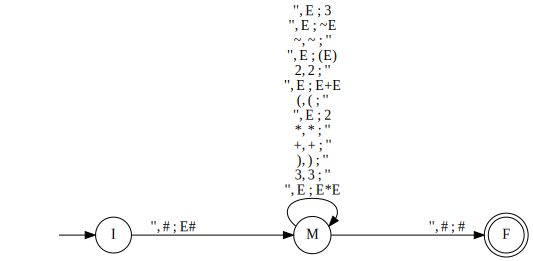

In [38]:
DOpdaEamb = dotObj_pda(pdaEamb, FuseEdges=True)
DOpdaEamb

In [39]:
explore_pda("3+2*3", pdaEamb, STKMAX=5)

String 3+2*3 accepted by your PDA in 2 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('I', '3+2*3', '#')
->  ('M', '3+2*3', 'E#')
->  ('M', '3+2*3', 'E*E#')
->  ('M', '3+2*3', 'E+E*E#')
->  ('M', '3+2*3', '3+E*E#')
->  ('M', '+2*3', '+E*E#')
->  ('M', '2*3', 'E*E#')
->  ('M', '2*3', '2*E#')
->  ('M', '*3', '*E#')
->  ('M', '3', 'E#')
->  ('M', '3', '3#')
->  ('M', '', '#')
->  ('F', '', '#') .
Final state  ('F', '', '#')
Reached as follows:
->  ('I', '3+2*3', '#')
->  ('M', '3+2*3', 'E#')
->  ('M', '3+2*3', 'E+E#')
->  ('M', '3+2*3', '3+E#')
->  ('M', '+2*3', '+E#')
->  ('M', '2*3', 'E#')
->  ('M', '2*3', 'E*E#')
->  ('M', '2*3', '2*E#')
->  ('M', '*3', '*E#')
->  ('M', '3', 'E#')
->  ('M', '3', '3#')
->  ('M', '', '#')
->  ('F', '', '#') .


In [40]:
explore_pda("3+2*3+2*3", pdaEamb, STKMAX=7)

String 3+2*3+2*3 accepted by your PDA in 13 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('I', '3+2*3+2*3', '#')
->  ('M', '3+2*3+2*3', 'E#')
->  ('M', '3+2*3+2*3', 'E*E#')
->  ('M', '3+2*3+2*3', 'E*E*E#')
->  ('M', '3+2*3+2*3', 'E+E*E*E#')
->  ('M', '3+2*3+2*3', '3+E*E*E#')
->  ('M', '+2*3+2*3', '+E*E*E#')
->  ('M', '2*3+2*3', 'E*E*E#')
->  ('M', '2*3+2*3', '2*E*E#')
->  ('M', '*3+2*3', '*E*E#')
->  ('M', '3+2*3', 'E*E#')
->  ('M', '3+2*3', 'E+E*E#')
->  ('M', '3+2*3', '3+E*E#')
->  ('M', '+2*3', '+E*E#')
->  ('M', '2*3', 'E*E#')
->  ('M', '2*3', '2*E#')
->  ('M', '*3', '*E#')
->  ('M', '3', 'E#')
->  ('M', '3', '3#')
->  ('M', '', '#')
->  ('F', '', '#') .
Final state  ('F', '', '#')
Reached as follows:
->  ('I', '3+2*3+2*3', '#')
->  ('M', '3+2*3+2*3', 'E#')
->  ('M', '3+2*3+2*3', 'E*E#')
->  ('M', '3+2*3+2*3', 'E+E*E#')
->  ('M', '3+2*3+2*3', '3+E*E#')
->  ('M', '+2*3+2*3', '+E*E#')
->  ('M', '2*3+2*3', 'E*E#')
->  ('M', '2*3+2*3', '2*E#')
->  (

### Disambiguated Arithmetic Expression Grammar

In [41]:
# Parsing an arithmetic expression
pdaE = md2mc('''PDA
!!E -> E+T | T
!!T -> T*F | F
!!F -> 2 | 3 | ~F | (E)
I : '', #  ; E#  -> M
M : '', E  ; E+T -> M
M : '', E  ; T   -> M
M : '', T  ; T*F -> M
M : '', T  ; F   -> M
M : '', F  ; 2   -> M
M : '', F  ; 3   -> M
M : '', F  ; ~F  -> M
M : '', F  ; (E) -> M
M : ~,  ~  ; ''  -> M
M : 2,  2  ; ''  -> M
M : 3,  3  ; ''  -> M
M : (,  (  ; ''  -> M
M : ),  )  ; ''  -> M
M : +,  +  ; ''  -> M
M : *,  *  ; ''  -> M
M : '', #  ; #   -> F
'''
)

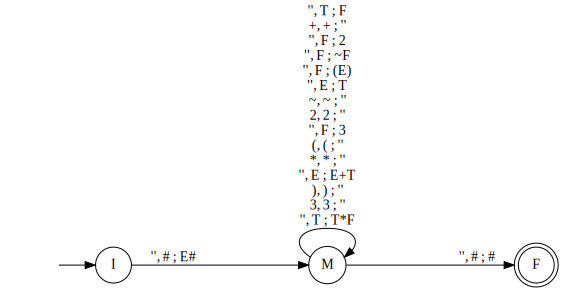

In [42]:
DOpdaE = dotObj_pda(pdaE, FuseEdges=True)
DOpdaE

In [43]:
explore_pda("3+2*3", pdaE, STKMAX=7)

String 3+2*3 accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('I', '3+2*3', '#')
->  ('M', '3+2*3', 'E#')
->  ('M', '3+2*3', 'E+T#')
->  ('M', '3+2*3', 'T+T#')
->  ('M', '3+2*3', 'F+T#')
->  ('M', '3+2*3', '3+T#')
->  ('M', '+2*3', '+T#')
->  ('M', '2*3', 'T#')
->  ('M', '2*3', 'T*F#')
->  ('M', '2*3', 'F*F#')
->  ('M', '2*3', '2*F#')
->  ('M', '*3', '*F#')
->  ('M', '3', 'F#')
->  ('M', '3', '3#')
->  ('M', '', '#')
->  ('F', '', '#') .


In [44]:
explore_pda("3+2*3+2*3", pdaE, STKMAX=7)

String 3+2*3+2*3 accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('I', '3+2*3+2*3', '#')
->  ('M', '3+2*3+2*3', 'E#')
->  ('M', '3+2*3+2*3', 'E+T#')
->  ('M', '3+2*3+2*3', 'E+T+T#')
->  ('M', '3+2*3+2*3', 'T+T+T#')
->  ('M', '3+2*3+2*3', 'F+T+T#')
->  ('M', '3+2*3+2*3', '3+T+T#')
->  ('M', '+2*3+2*3', '+T+T#')
->  ('M', '2*3+2*3', 'T+T#')
->  ('M', '2*3+2*3', 'T*F+T#')
->  ('M', '2*3+2*3', 'F*F+T#')
->  ('M', '2*3+2*3', '2*F+T#')
->  ('M', '*3+2*3', '*F+T#')
->  ('M', '3+2*3', 'F+T#')
->  ('M', '3+2*3', '3+T#')
->  ('M', '+2*3', '+T#')
->  ('M', '2*3', 'T#')
->  ('M', '2*3', 'T*F#')
->  ('M', '2*3', 'F*F#')
->  ('M', '2*3', '2*F#')
->  ('M', '*3', '*F#')
->  ('M', '3', 'F#')
->  ('M', '3', '3#')
->  ('M', '', '#')
->  ('F', '', '#') .


In [45]:
explore_pda("3*2*~3+~~3*~3", pdaE, STKMAX=10)

String 3*2*~3+~~3*~3 accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('I', '3*2*~3+~~3*~3', '#')
->  ('M', '3*2*~3+~~3*~3', 'E#')
->  ('M', '3*2*~3+~~3*~3', 'E+T#')
->  ('M', '3*2*~3+~~3*~3', 'T+T#')
->  ('M', '3*2*~3+~~3*~3', 'T*F+T#')
->  ('M', '3*2*~3+~~3*~3', 'T*F*F+T#')
->  ('M', '3*2*~3+~~3*~3', 'F*F*F+T#')
->  ('M', '3*2*~3+~~3*~3', '3*F*F+T#')
->  ('M', '*2*~3+~~3*~3', '*F*F+T#')
->  ('M', '2*~3+~~3*~3', 'F*F+T#')
->  ('M', '2*~3+~~3*~3', '2*F+T#')
->  ('M', '*~3+~~3*~3', '*F+T#')
->  ('M', '~3+~~3*~3', 'F+T#')
->  ('M', '~3+~~3*~3', '~F+T#')
->  ('M', '3+~~3*~3', 'F+T#')
->  ('M', '3+~~3*~3', '3+T#')
->  ('M', '+~~3*~3', '+T#')
->  ('M', '~~3*~3', 'T#')
->  ('M', '~~3*~3', 'T*F#')
->  ('M', '~~3*~3', 'F*F#')
->  ('M', '~~3*~3', '~F*F#')
->  ('M', '~3*~3', 'F*F#')
->  ('M', '~3*~3', '~F*F#')
->  ('M', '3*~3', 'F*F#')
->  ('M', '3*~3', '3*F#')
->  ('M', '*~3', '*F#')
->  ('M', '~3', 'F#')
->  ('M', '~3', '~F#')
->  ('M'

In [46]:
explore_pda("3*2*~3+~~3*~3", pdaEamb, STKMAX=8)

String 3*2*~3+~~3*~3 accepted by your PDA in 36 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('I', '3*2*~3+~~3*~3', '#')
->  ('M', '3*2*~3+~~3*~3', 'E#')
->  ('M', '3*2*~3+~~3*~3', 'E*E#')
->  ('M', '3*2*~3+~~3*~3', 'E*E*E#')
->  ('M', '3*2*~3+~~3*~3', 'E*E*E*E#')
->  ('M', '3*2*~3+~~3*~3', '3*E*E*E#')
->  ('M', '*2*~3+~~3*~3', '*E*E*E#')
->  ('M', '2*~3+~~3*~3', 'E*E*E#')
->  ('M', '2*~3+~~3*~3', '2*E*E#')
->  ('M', '*~3+~~3*~3', '*E*E#')
->  ('M', '~3+~~3*~3', 'E*E#')
->  ('M', '~3+~~3*~3', 'E+E*E#')
->  ('M', '~3+~~3*~3', '~E+E*E#')
->  ('M', '3+~~3*~3', 'E+E*E#')
->  ('M', '3+~~3*~3', '3+E*E#')
->  ('M', '+~~3*~3', '+E*E#')
->  ('M', '~~3*~3', 'E*E#')
->  ('M', '~~3*~3', '~E*E#')
->  ('M', '~3*~3', 'E*E#')
->  ('M', '~3*~3', '~E*E#')
->  ('M', '3*~3', 'E*E#')
->  ('M', '3*~3', '3*E#')
->  ('M', '*~3', '*E#')
->  ('M', '~3', 'E#')
->  ('M', '~3', '~E#')
->  ('M', '3', 'E#')
->  ('M', '3', '3#')
->  ('M', '', '#')
->  ('F', '', '#') .
Final state 